# Fertility in Developed and Developing Countries
---

### Analysis

(Placeholder) In this project we will compare the fertility in developed vs developing countries. Using UN data we aim to draw conclusions based on a country's development and their fertility, contraceptive use, and infant survival rates. This will allow for an understanding of how human development may influence a society's perspective on sex and birth.

---
 

### Importing and Cleaning Fertility Data

In [1]:
import pandas as pd

# Read in data
fertility_df = pd.read_excel('data/fertility.xlsx')

# Clean up data
fertility_df = fertility_df.iloc[1:]

# Renaming for readability
fertility_df.rename(columns={'Reference': 'Year'}, inplace=True)
fertility_df.rename(columns={'Age-specific fertility rates': 'Age: 15-19'}, inplace=True)
fertility_df.rename(columns={'Unnamed: 7': 'Fertility at age: 20-24'}, inplace=True)
fertility_df.rename(columns={'Unnamed: 8': 'Fertility at age: 25-29'}, inplace=True)
fertility_df.rename(columns={'Unnamed: 9': 'Fertility at age: 30-34'}, inplace=True)
fertility_df.rename(columns={'Unnamed: 10': 'Fertility at age: 35-39'}, inplace=True)
fertility_df.rename(columns={'Unnamed: 11': 'Fertility at age: 40-44'}, inplace=True)
fertility_df.rename(columns={'Unnamed: 12': 'Fertility at age: 45-49'}, inplace=True)

# Drop uneccessary columns
fertility_df.drop(columns=['Unnamed: 4'], inplace=True)
fertility_df.drop(columns=['Source type'], inplace=True)
fertility_df.drop(columns=['Source'], inplace=True)
fertility_df.drop(columns=['Survey name'], inplace=True)
fertility_df.drop(columns=['Note on country or population'], inplace=True)
fertility_df.drop(columns=['Note on age'], inplace=True)
fertility_df.drop(columns=['Note on methods'], inplace=True)
fertility_df.drop(columns=['Note on population data used in denominator'], inplace=True)

# Write to csv
fertility_df.to_csv('data/fertility_clean.csv', index=False)

# Show dataframe
fertility_df


,Country,ISO code,Period,Reference,Total fertility,Age: 15-19,Fertility at age: 20-24,Fertility at age: 25-29,Fertility at age: 30-34,Fertility at age: 35-39,Fertility at age: 40-44,Fertility at age: 45-49,Mean age at childbearing
1,Afghanistan,4.0,Around 1970,1973,8.21,168,359,355,307,235,137,81,30
2,Afghanistan,4.0,..,1979,7.11,105,260,309,301,262,185,..,30.7
3,Afghanistan,4.0,Around 2005,2003,7.52,146,333,350,289,217,143,..,30.1
4,Afghanistan,4.0,Latest,2009,5.11,80,257,262,209,128,60,26,29.1
5,Albania,8.0,Around 1970,1970,5.16,39,275,266,214,146,69,22,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,Zimbabwe,716.0,Around 1970,1969,6.74,79,272,304,257,218,145,73,31.2
1070,Zimbabwe,716.0,Around 1985,1987,5.42,102,251,250,212,158,80,32,29.5
1071,Zimbabwe,716.0,Around 1995,1998,3.98,112,199,180,135,108,46,15,28.3
1072,Zimbabwe,716.0,Around 2005,2004,3.8,99,205,172,144,86,42,13,28.1


### Importing and Cleaning GDP (Development) Data

In [2]:
import xml.etree.ElementTree as ET
import pandas as pd

# Read in XML data
tree = ET.parse('data/gdp_per_capita.xml')
root = tree.getroot()

# Iterate through and add xml records
data = []

for record in root.findall('.//record'):
    record_data = {}
    for field in record.findall('field'):
        name = field.get('name')
        value = field.text if field.text else None
        record_data[name] = value
    data.append(record_data)

# Create DataFrame from data
gdp_pc_df = pd.DataFrame(data)

# Clean up data
gdp_pc_df.drop(columns=['Value Footnotes'], inplace=True)

# Remove non-country areas
gdp_pc_df.rename(columns={'Country or Area': 'Country'}, inplace=True)
gdp_pc_df = gdp_pc_df[~gdp_pc_df['Country'].isin([
    'Africa Eastern and Southern', 'Africa Western and Central', "Arab World", 
    "Caribbean small states", "Central Europe and the Baltics", "Early-demographic dividend", 
    "East Asia & Pacific", "East Asia & Pacific (excluding high income)", 
    "East Asia & Pacific (IDA & IBRD)", "Europe & Central Asia", 
    "Europe & Central Asia (excluding high income)", "Euro area", 
    "Europe & Central Asia (IDA & IBRD)", "European Union", 
    "Fragile and conflict affected situations", "Heavily indebted poor countries (HIPC)", 
    "High income", "IBRD only", "IDA & IBRD total", "IDA blend", "IDA only", 
    "IDA total", "Late-demographic dividend", "Latin America & Caribbean", 
    "Latin America & Caribbean (excluding high income)", 
    "Latin America & Caribbean (IDA & IBRD)", "Least developed countries: UN classification", 
    "Low & middle income", "Low income", "Lower middle income", 
    "Middle East & North Africa", "Middle East & North Africa (excluding high income)", 
    "Middle East & North Africa (IDA & IBRD)", "Middle income", 
    "North America", "OECD members", "Other small states", 
    "Pacific island small states", "Post-demographic dividend", 
    "Pre-demographic dividend", "Small states", "South Asia", 
    "South Asia (IDA & IBRD)", "Sub-Saharan Africa", 
    "Sub-Saharan Africa (excluding high income)", "Sub-Saharan Africa (IDA & IBRD)", 
    "Upper middle income", "World"])]

# Get development status (> or < 12000 USD)
gdp_pc_df['Value'] = pd.to_numeric(gdp_pc_df['Value'], errors='coerce')
gdp_pc_df['Development'] = gdp_pc_df['Value'].apply(lambda x: 'Developed' if x > 12000 else 'Developing')

# Sort the DataFrame by Country and Year
gdp_pc_df = gdp_pc_df.sort_values(by=['Country', 'Year'])

# Find best year for each country (2012 oreferred, else under 2012, then if need be over 2012)
gdp_pc_df['Year'] = pd.to_numeric(gdp_pc_df['Year'], errors='coerce')
df_pre_2012 = gdp_pc_df[gdp_pc_df['Year'] <= 2012].sort_values(by=['Country', 'Year'], ascending=[True, False])
df_post_2012 = gdp_pc_df[gdp_pc_df['Year'] > 2012].sort_values(by=['Country', 'Year'], ascending=[True, True])
df_pre_2012_closest = df_pre_2012.groupby('Country').first().reset_index()
df_post_2012_closest = df_post_2012[~df_post_2012['Country'].isin(df_pre_2012_closest['Country'])].groupby('Country').first().reset_index()
gdp_pc_df = pd.concat([df_pre_2012_closest, df_post_2012_closest], ignore_index=True)


# Write to CSV
gdp_pc_df.to_csv('data/gdp_clean.csv', index=False)

gdp_pc_df



,Country,Year,Value,Development
0,Afghanistan,2012,1958.447627,Developing
1,Albania,2012,10526.250106,Developing
2,Algeria,2012,13347.362795,Developed
3,Angola,2012,7389.314960,Developing
4,Antigua and Barbuda,2012,20208.939288,Developed
...,...,...,...,...
193,Yemen,2012,3258.192678,Developing
194,Zambia,2012,3357.738371,Developing
195,Zimbabwe,2012,2349.028207,Developing
196,Djibouti,2013,3730.366512,Developing


### Merging Fertility and Development Data

In [3]:
# Get average fertility in each country
fertility_df['Total fertility'] = pd.to_numeric(fertility_df['Total fertility'], errors='coerce')
avg_fertility_df = fertility_df.groupby(['Country'], as_index=False).agg({'Total fertility': 'mean'})

# Match names for merging
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('Bolivia (Plurinational State of)', 'Bolivia')
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('Czech Republic', 'Czechia')
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('Democratic Republic of the Congo', 'Congo DRC')
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('Iran (Islamic Republic of)', 'Iran')
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('Lao People\'s Democratic Republic', 'Laos')
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('The former Yugoslav Republic of Macedonia', 'North Macedonia')
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('Russian Federation', 'Russia')
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('Swaziland', 'Eswatini')
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('Republic of Korea', 'South Korea')
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('United Republic of Tanzania', 'Tanzania')
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('United States of America', 'United States')
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('Venezuela (Bolivarian Republic of)', 'Venezuela')
avg_fertility_df['Country'] = avg_fertility_df['Country'].replace('Viet Nam', 'Vietnam')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('The Bahamas', 'Bahamas')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('CÃ´te d\'Ivoire', 'Côte d\'Ivoire')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('Dem. Rep. Congo', 'Congo DRC')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('The Gambia', 'Gambia')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('Kyrgyz Republic', 'Kyrgyzstan')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('Lao PDR', 'Laos')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('St. Kitts and Nevis', 'Saint Kitts and Nevis')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('St. Lucia', 'Saint Lucia')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('St. Vincent and the Grenadines', 'Saint Vincent and the Grenadines')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('Slovak Republic', 'Slovakia')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('Korea', 'South Korea')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('TÃ¼rkiye', 'Turkey')
gdp_pc_df['Country'] = gdp_pc_df['Country'].replace('Viet Nam', 'Vietnam')

# Merge with GDP
gdp_fertility_df = pd.merge(avg_fertility_df, gdp_pc_df, on="Country", how="inner")
gdp_fertility_df.rename(columns={'Total fertility': 'Fertility'}, inplace=True)

gdp_fertility_df


,Country,Fertility,Year,Value,Development
0,Afghanistan,6.9875,2012,1958.447627,Developing
1,Albania,2.8580,2012,10526.250106,Developing
2,Algeria,4.5420,2012,13347.362795,Developed
3,Angola,6.4400,2012,7389.314960,Developing
4,Antigua and Barbuda,2.2220,2012,20208.939288,Developed
...,...,...,...,...,...
182,Venezuela,3.4800,2011,17402.275659,Developed
183,Vietnam,3.4240,2012,6364.978023,Developing
184,Yemen,6.7980,2012,3258.192678,Developing
185,Zambia,6.2440,2012,3357.738371,Developing


### Importing and cleaning Country Centroid Coordinate Data

In [4]:
import pandas as pd

# Read in country data
countries_df = pd.read_csv('data/countries.csv')

# Clean the data
countries_df.rename(columns={'COUNTRY': 'Country'}, inplace=True)
countries_df.drop(columns=['ISO'], inplace=True)
countries_df.drop(columns=['COUNTRYAFF'], inplace=True)
countries_df.drop(columns=['AFF_ISO'], inplace=True)
countries_df['Country'] = countries_df['Country'].replace('Czech Republic', 'Czechia')
countries_df['Country'] = countries_df['Country'].replace('Russian Federation', 'Russia')

#countries_df
# Merge with GDP
gdp_fertility_df = pd.merge(gdp_fertility_df, countries_df, on="Country", how="inner")

# Write to csv
gdp_fertility_df.to_csv('data/dev_fert_latlng.csv', index=False)

gdp_fertility_df

,Country,Fertility,Year,Value,Development,longitude,latitude
0,Afghanistan,6.9875,2012,1958.447627,Developing,66.592161,34.134026
1,Albania,2.8580,2012,10526.250106,Developing,20.061083,41.141659
2,Algeria,4.5420,2012,13347.362795,Developed,2.655846,28.350970
3,Angola,6.4400,2012,7389.314960,Developing,17.651769,-12.167424
4,Antigua and Barbuda,2.2220,2012,20208.939288,Developed,-61.785308,17.071468
...,...,...,...,...,...,...,...
182,Venezuela,3.4800,2011,17402.275659,Developed,-66.364921,7.148325
183,Vietnam,3.4240,2012,6364.978023,Developing,105.913388,16.517347
184,Yemen,6.7980,2012,3258.192678,Developing,47.468158,16.001393
185,Zambia,6.2440,2012,3357.738371,Developing,27.755214,-13.162833


# Map of Fertility in Developed and Developing Countries
 

In [5]:
import geoviews as gv
import hvplot.pandas
import time

# Multiply Fertility by 100 to control marker size
gdp_fertility_df['Fertility_Size'] = gdp_fertility_df['Fertility'] * 10

# Map coloring
color_map = {
    'Developed': 'blue',
    'Developing': 'orange'
}

# Configure the map plot
tiles = gv.tile_sources.OSM()

map_plot = tiles * gdp_fertility_df.hvplot.points(
    'longitude', 'latitude',
    geo=True,
    size='Fertility_Size',
    color=gdp_fertility_df['Development'].map(color_map),
    title='Fertility in Developed and Developing Countries',
    hover_cols=['Country', 'Development', 'Fertility'],
    frame_height=400,
    frame_width=600
)

# Display the map
map_plot


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (_color,Fertility_Size,Country,Development,Fertility)

# Satter Plot of Fertility in Developed and Developing Countries
 

In [6]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def plot_lin_reg(x, y, x_label, y_label, title, development="Developed"):
    if(development == "Developed"):
        s_color = "blue"
    elif(development == "Developing"):
        s_color = "orange"
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x, y)
    regress_values = slope * x + intercept

    # make plot and line
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color=s_color, edgecolor='black', linewidths=1, marker='o', alpha=0.75)
    plt.plot(x, regress_values, color="red", label=f"Linear Reg (slope={slope:.2f})")
    
    # Incorporate the other graph properties
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.grid(True)
    plt.show()

# Get only developed
deved_df = gdp_fertility_df[gdp_fertility_df['Development'] == 'Developed']

# Get only developing
not_deved_df = gdp_fertility_df[gdp_fertility_df['Development'] == 'Developing']


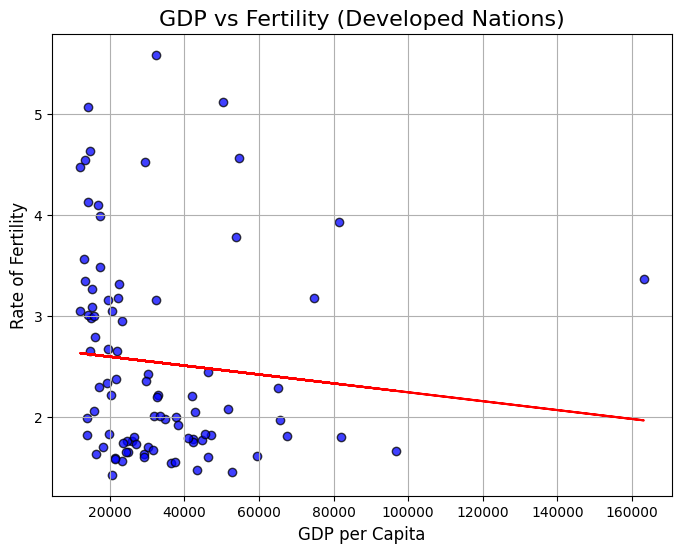

In [7]:
plot_lin_reg(deved_df["Value"], deved_df["Fertility"], "GDP per Capita", "Rate of Fertility", "GDP vs Fertility (Developed Nations)", "Developed")

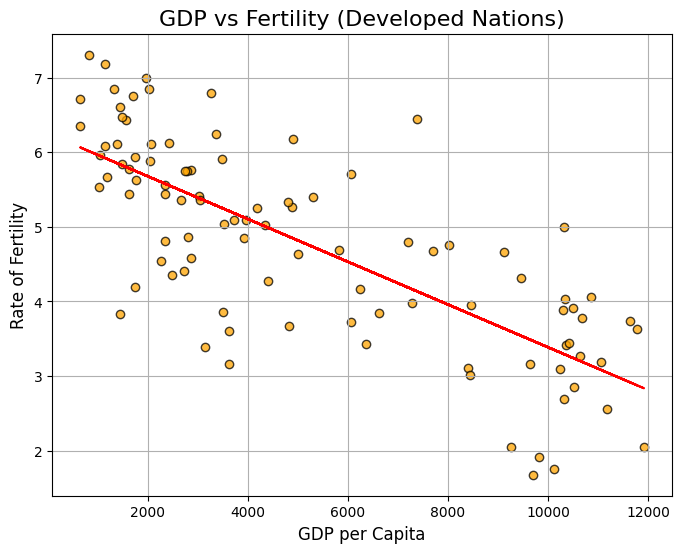

In [8]:
plot_lin_reg(not_deved_df["Value"], not_deved_df["Fertility"], "GDP per Capita", "Rate of Fertility", "GDP vs Fertility (Developed Nations)", "Developing")

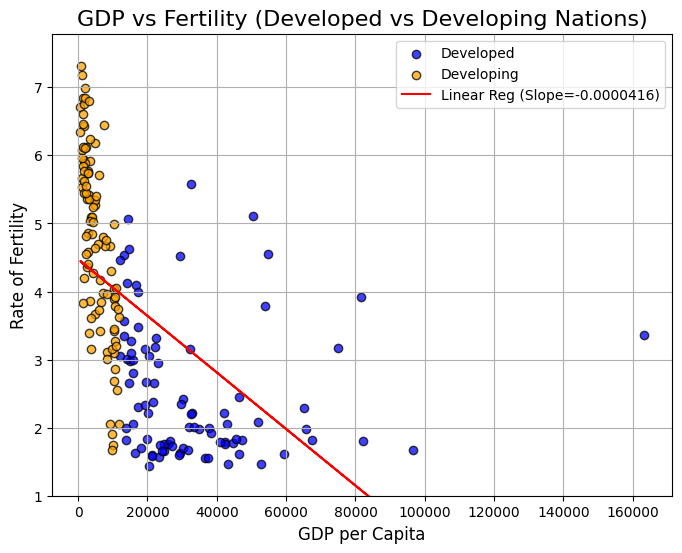

In [9]:
# Perform linear regression
slope, intercept, _, _, _ = linregress(gdp_fertility_df["Value"], gdp_fertility_df["Fertility"])
regress_values = slope * gdp_fertility_df["Value"] + intercept

# make plot and line
plt.figure(figsize=(8, 6))
    
# Scatter for developed (blue)
developed = gdp_fertility_df[gdp_fertility_df['Development'] == 'Developed']
plt.scatter(developed["Value"], developed["Fertility"], color="blue", edgecolor='black', 
linewidths=1, marker='o', alpha=0.75, label='Developed')
    
# Scatter for developing (orange)
developing = gdp_fertility_df[gdp_fertility_df['Development'] == 'Developing']
plt.scatter(developing["Value"], developing["Fertility"], color="orange", edgecolor='black', 
            linewidths=1, marker='o', alpha=0.75, label='Developing')
    
plt.plot(gdp_fertility_df["Value"], regress_values, color="red", label=f"Linear Reg (Slope={slope:.7f})")
    
# Incorporate the other graph properties
plt.ylim(1)
plt.title("GDP vs Fertility (Developed vs Developing Nations)", fontsize=16)
plt.xlabel("GDP per Capita", fontsize=12)
plt.ylabel("Rate of Fertility", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()